In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import numpy as np
import pandas as pd
import seaborn as sns

di = pd.read_csv('diagnoses.csv')
le = pd.read_csv('lab_events.csv')

In [17]:
features, true_labels = make_blobs(
    n_samples = 150,
    centers = 3,
    cluster_std = 2.75,
    random_state = 42
)

In [18]:
features[:5]

array([[-2.60771923, 13.31705618],
       [-4.81704581,  8.16395209],
       [-6.10689955, -8.59253327],
       [ 9.82689006,  2.45325867],
       [-5.46328021, -5.46719823]])

In [19]:
true_labels[:5]

array([0, 0, 2, 1, 2])

In [20]:
scaler = StandardScaler()
   ...: scaled_features = scaler.fit_transform(features)

In [21]:
scaled_features[:5]

array([[-0.17220398,  1.70877741],
       [-0.58914002,  0.96899376],
       [-0.8325565 , -1.43658036],
       [ 2.17441004,  0.14916216],
       [-0.71109501, -0.98790482]])

In [22]:
kmeans = KMeans(
   ...:     init="random",
   ...:     n_clusters=3,
   ...:     n_init=10,
   ...:     max_iter=300,
   ...:     random_state=42
   ...: )

In [23]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [24]:
kmeans.inertia_

58.10638703695202

In [25]:
kmeans.n_iter_

4

In [26]:
kmeans_kwargs = {
   ...:     "init": "random",
   ...:     "n_init": 10,
   ...:     "max_iter": 300,
   ...:     "random_state": 42,
   ...: }
   ...:
   ...: sse = []
   ...: for k in range(1, 11):
   ...:     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   ...:     kmeans.fit(scaled_features)
   ...:     sse.append(kmeans.inertia_)

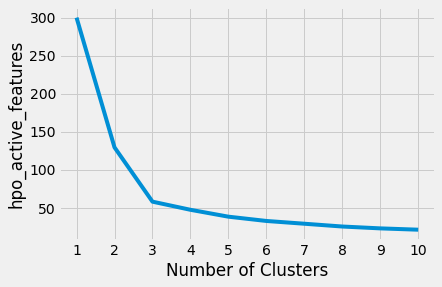

In [27]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("hpo_active_features")
plt.show()

In [28]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = kMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

NameError: name 'kMeans' is not defined

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

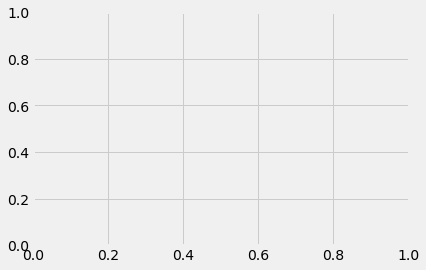

In [29]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of clusters")
plt.ylabel("Diagnosis hpo_features")